In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<h3>Basic EDA</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

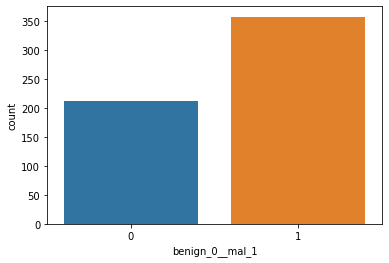

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

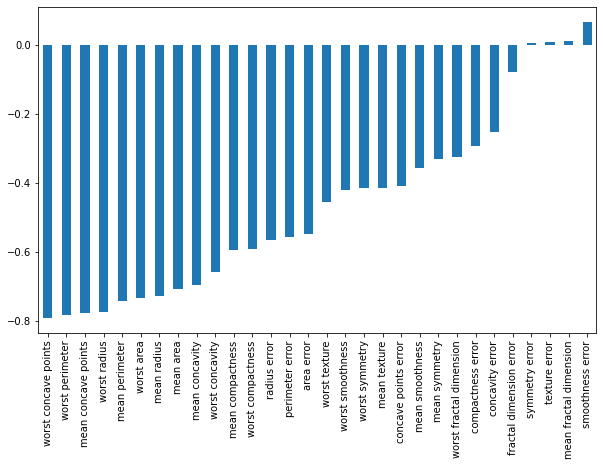

In [6]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
X_train.shape

(398, 30)

In [15]:
model = Sequential()
model.add(Dense(30, activation='relu'))     # hidden layer 1
model.add(Dense(15, activation='relu'))     # hidden layer 2
model.add(Dense(1,activation = 'sigmoid'))  # output layer, sigmoidal because it's an binary classifcation

2022-03-16 18:59:15.906558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-16 18:59:15.906598: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-16 18:59:15.906623: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-03-16 18:59:15.910318: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [17]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 1s 16ms/step - loss: 0.8474 - val_loss: 0.6478
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5804 - val_loss: 0.4844
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4459 - val_loss: 0.3819
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3542 - val_loss: 0.3048
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.2860 - val_loss: 0.2475
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2378 - val_loss: 0.2063
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2038 - val_loss: 0.1773
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1793 - val_loss: 0.1549
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1610 - val_loss: 0.1364
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1457 - val_loss: 0.1216
Epoch 11

In [18]:
loss = pd.DataFrame(model.history.history)
loss[:5]

,loss,val_loss
0,0.847443,0.647770
1,0.580443,0.484444
2,0.445931,0.381853
3,0.354246,0.304810
4,0.286004,0.247484


<AxesSubplot:>

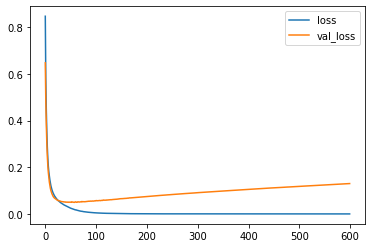

In [19]:
loss.plot()     # this is an example for overfitting

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred.round()))
print(confusion_matrix(y_test,pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

[[ 61   2]
 [  0 108]]


- Intially, both the training loss and validation loss decreases
- But at certain point of time, we notice that our training loss is still going on down, but our validation loss starts to increase
- Which means, we are overfitting to our training dataset
- Which means, we are training for way too many epochs
- So, we try to prevent overfitting by using early stopping and dropout layers

<h2>Creating a TensorBoard Callback</h2>

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [23]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

# If our metric is accuracy, then mode='max', because we need to max the accuracy
# If our metric is loss, then mode='min', because we need to reduce the loss
# patience = 25 means that we will wait for 25 epochs more, even after detecting a stopping point because of noise that could occur

In [24]:
pwd

'/home/studio-lab-user/sagemaker-studiolab-notebooks/Deep-Learning/Notebook/TensorBoard'

In [27]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d--%H%M")    # this will make sure we will have a unique log for each time you run the model

'2022-03-16--1902'

In [28]:
log_directory = 'logs\fit'

In [29]:
board = TensorBoard(log_dir=log_directory, histogram_freq=1,
                   write_graph=True,
                   write_images=True,
                   update_freq='epoch',
                   profile_batch=2,embeddings_freq=1)

2022-03-16 19:06:48.571569: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-03-16 19:06:48.571598: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-03-16 19:06:48.575239: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [30]:
model = Sequential()
model.add(Dense(30, activation='relu'))     # hidden layer 1
model.add(Dense(15, activation='relu'))     # hidden layer 2
model.add(Dense(1,activation = 'sigmoid'))  # output layer, sigmoidal because it's an binary classifcation

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [137]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [32]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop, board])

Epoch 1/600
 4/13 [========>.....................] - ETA: 0s - loss: 0.6011

2022-03-16 19:07:18.989459: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-03-16 19:07:18.989504: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-03-16 19:07:18.992490: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-03-16 19:07:18.999049: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-03-16 19:07:19.010155: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logsit/plugins/profile/2022_03_16_19_07_19

2022-03-16 19:07:19.014364: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logsit/plugins/profile/2022_03_16_19_07_19/default.trace.json.gz
2022-03-16 19:07:19.033695: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logsit/plugins/profile/2022_03_16_19_07_19

2022-03-16 19:07:19.033850: I tensorflow/co

13/13 [==============================] - 1s 30ms/step - loss: 0.5481 - val_loss: 0.3973
Epoch 2/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3658 - val_loss: 0.2698
Epoch 3/600
13/13 [==============================] - 0s 7ms/step - loss: 0.2700 - val_loss: 0.2064
Epoch 4/600
13/13 [==============================] - 0s 7ms/step - loss: 0.2172 - val_loss: 0.1662
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1835 - val_loss: 0.1404
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1603 - val_loss: 0.1229
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1437 - val_loss: 0.1086
Epoch 8/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1290 - val_loss: 0.0982
Epoch 9/600
13/13 [==============================] - 0s 9ms/step - loss: 0.1179 - val_loss: 0.0906
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1088 - val_loss: 0.0835
Epoch 11/600
13/13 [

In [33]:
print(log_directory)

logsit


In [34]:
pwd

'/home/studio-lab-user/sagemaker-studiolab-notebooks/Deep-Learning/Notebook/TensorBoard'

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss[:5]

,loss,val_loss
0,0.548076,0.397313
1,0.365809,0.269762
2,0.270040,0.206366
3,0.217158,0.166179
4,0.183471,0.140361


<AxesSubplot:>

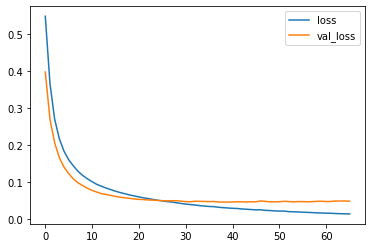

In [36]:
model_loss.plot()

In [37]:
pred_2 = model.predict(X_test)
print(classification_report(y_test,pred_2.round()))
print(confusion_matrix(y_test,pred_2.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[ 62   1]
 [  1 107]]


- Next, we can prevent overfitting by using dropout layers
- Dropout layers will essentially turn off a percentage of neurons randomly

In [38]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(30, activation='relu'))     # hidden layer 1
model.add(Dropout(rate=0.5))
model.add(Dense(15, activation='relu'))     # hidden layer 2
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation = 'sigmoid'))  # output layer, sigmoidal because it's an binary classifcation
model.compile(loss='binary_crossentropy',optimizer='adam')

# rate=0.5 means that 50% of neurons are going to be turned off randomly, which also means that each neuron has 50% chance of getting turned off

In [39]:
model.fit(X_train,y_train,epochs=600,validation_data=[X_test,y_test],callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.8398 - val_loss: 0.5359
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6649 - val_loss: 0.4106
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5530 - val_loss: 0.3253
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4771 - val_loss: 0.2663
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4654 - val_loss: 0.2270
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4258 - val_loss: 0.2003
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3495 - val_loss: 0.1817
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3656 - val_loss: 0.1664
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3266 - val_loss: 0.1531
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3564 - val_loss: 0.1427
Epoch 11

<AxesSubplot:>

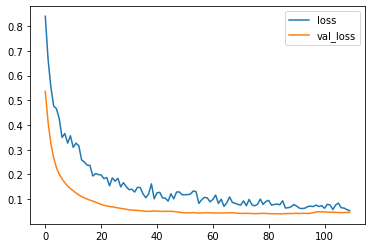

In [40]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [41]:
pred = model.predict(X_test)

In [42]:
print(classification_report(y_test,pred.round()))
print(confusion_matrix(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[ 62   1]
 [  1 107]]


In [43]:
model.save('ANN_clasification.h5')